In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
dataset = pd.read_csv('C:\\Users\\Dell\\Desktop\\python books\\ML_Udemy\\Machine Learning A-Z (Codes and Datasets)\\Part 3 - Classification\\Section 19 - Decision Tree Classification\\Python/car_evaluation.csv',header = None)

# Introduction to Decision Tree algorithm

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

At the beginning, the whole training set is considered as the root.
Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
Records are distributed recursively on the basis of attribute values.
Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
I will describe Decision Tree terminology in later section.

# Classification and Regression Trees (CART) 
Table of Contents

Nowadays, Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.

The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this kernel, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.

# Decision Tree algorithm terminology 


In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-

Root Node
It represents the entire population or sample. This further gets divided into two or more homogeneous sets.
Splitting
It is a process of dividing a node into two or more sub-nodes.
Decision Node

When a sub-node splits into further sub-nodes, then it is called a decision node.
Leaf/Terminal Node
Nodes that do not split are called Leaf or Terminal nodes.
Pruning
When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.
Branch/Sub-Tree
A sub-section of an entire tree is called a branch or sub-tree.

Parent and Child Node
A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.
The above terminology is represented clearly in the following diagram:-

# Decision Tree algorithm intuition
    
The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.

The Decision Tree algorithm intuition is as follows:-

For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

# Attribute selection measures
The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

Information gain

Gini index

While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

# Information gain
By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called Entropy.

## Entropy

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

Entropy is represented by the following formula:-


The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node

# Gini index 
Table of Contents

Another attribute selection measure that CART (Categorical and Regression Trees) uses is the Gini index. It uses the Gini method to create split points.

Gini index can be represented with the following diagram:-

# Overfitting in Decision Tree algorithm 



Overfitting is a practical problem while building a Decision-Tree model. The problem of overfitting is considered when the algorithm continues to go deeper and deeper to reduce the training-set error but results with an increased test-set error. So, accuracy of prediction for our model goes down. It generally happens when we build many branches due to outliers and irregularities in data.

Two approaches which can be used to avoid overfitting are as follows:-

* Pre-Pruning

* Post-Pruning

## Pre-Pruning

In pre-pruning, we stop the tree construction a bit early. We prefer not to split a node if its goodness measure is below a threshold value. But it is difficult to choose an appropriate stopping point.

## Post-Pruning
In post-pruning, we go deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then pruning is done as a post-pruning step. We use the cross-validation data to check the effect of our pruning. Using cross-validation data, we test whether expanding a node will result in improve or not. If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded. So, the node should be converted to a leaf node.

In [5]:
dataset.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

dataset.columns = cols 

cols 

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
dataset.shape

(1728, 7)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
dataset.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [11]:
# find categorcal variable
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [12]:
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 0 numerical variables

The numerical variables are :

 []


### There is not any numerical parameters

## Explore categorical value

## Calculate freq

In [13]:
for col in cols:
    
    print(dataset[col].value_counts())

vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64
vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64
2        432
3        432
5more    432
4        432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [14]:
cols

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

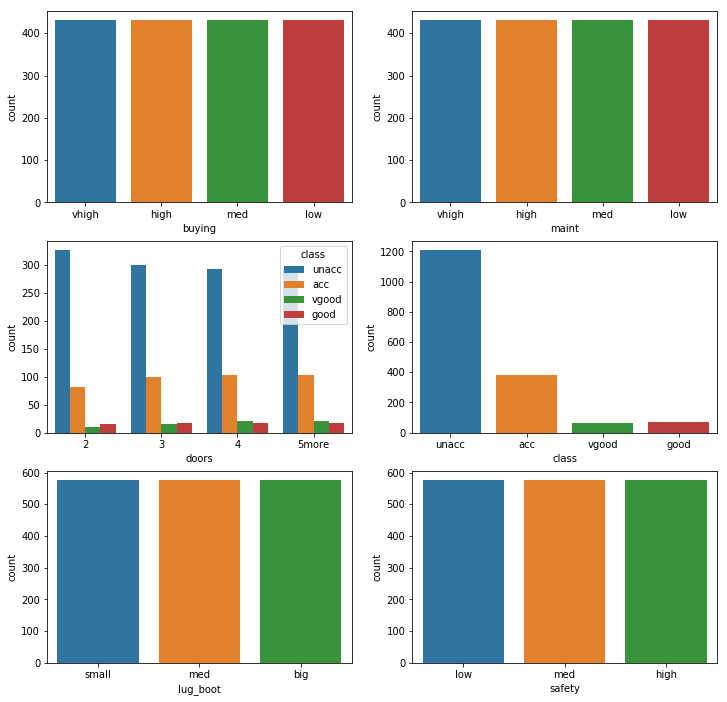

In [15]:
plt.figure(figsize = (12,12))

plt.subplot(3,2,1)
sns.countplot('buying',data = dataset)

plt.subplot(3,2,2)
sns.countplot('maint',data = dataset)

plt.subplot(3,2,3)
sns.countplot('doors',data = dataset, hue = 'class')

plt.subplot(3,2,4)
sns.countplot('class',data = dataset)

plt.subplot(3,2,5)
sns.countplot('lug_boot',data = dataset)

plt.subplot(3,2,6)
sns.countplot('safety',data = dataset)


In [16]:
dataset.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

* There is no null values in dataset

# Declare feature vector and target variable

In [17]:
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
X = dataset.drop(['class'], axis = 1)

y = dataset['class']

In [19]:
X.head(3)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high


In [20]:
y.head(3)

0    unacc
1    unacc
2    unacc
Name: class, dtype: object

# Split data into training and test set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [22]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1209, 6), (519, 6))

## Feature Engg

* Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [23]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [24]:
X_train.head(2)

,buying,maint,doors,persons,lug_boot,safety
580,high,high,3,4,med,med
1214,med,low,2,more,big,high


In [25]:
X_test.head(2)

,buying,maint,doors,persons,lug_boot,safety
1318,low,vhigh,2,more,med,med
124,vhigh,high,2,4,big,med


# Encode categorical variable

In [26]:
# import category encoders
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [27]:
X_train.head(2)

,buying_1,buying_2,buying_3,buying_4,maint_1,maint_2,maint_3,maint_4,doors_1,doors_2,...,doors_4,persons_1,persons_2,persons_3,lug_boot_1,lug_boot_2,lug_boot_3,safety_1,safety_2,safety_3
580,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1214,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [28]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1209, 21), (519, 21))

# Decision Tree Classifier with criterion gini index 

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Instance of the DecisionTreeClassifier model with criterion gini index

clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [31]:
y_pred_gini = clf_gini.predict(X_test)

In [32]:
y_pred_gini

array(['acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc

In [64]:
# cplr = np.array([ 0.01828922,  0.01972157,  0.02342053, ...,  0.25928021,
#     0.26352547,  0.26883406])
# import matplotlib.pyplot as plt
# # plt(cplr)

# plt.plot(cplr)
# plt.show()

In [60]:
y_pred_gini.value.counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [69]:
# print(type(y_pred_gini))
unique, counts = np.unique(y_pred_gini, return_counts=True)
dict(zip(unique, counts))

{'acc': 183, 'unacc': 336}

In [70]:
# plt.figure(figsize = (12,12))

# plt.subplot(3,2,1)
# sns.countplot('y_pred_gini')

In [33]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score: 0.8112


In [34]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'acc', 'unacc', ..., 'unacc', 'acc', 'unacc'], dtype=object)

In [35]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score: 0.8230


# Check for overfitting and underfitting

In [36]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8230
Test set score: 0.8112


* Here, the training-set accuracy score is 0.8230 while the test-set accuracy to be 0.8112. These two values are quite comparable. So, there is no sign of overfitting.

# Visualize decision trees

[Text(0.75, 0.9, 'X[20] <= 0.5\ngini = 0.457\nsamples = 1209\nvalue = [269, 44, 847, 49]'),
 Text(0.625, 0.7, 'X[14] <= 0.5\ngini = 0.581\nsamples = 798\nvalue = [269, 44, 436, 49]'),
 Text(0.5, 0.5, 'X[7] <= 0.5\ngini = 0.627\nsamples = 535\nvalue = [269, 44, 173, 49]'),
 Text(0.25, 0.3, 'X[2] <= 0.5\ngini = 0.622\nsamples = 414\nvalue = [227, 44, 94, 49]'),
 Text(0.125, 0.1, 'gini = 0.541\nsamples = 311\nvalue = [190, 13, 88, 20]'),
 Text(0.375, 0.1, 'gini = 0.698\nsamples = 103\nvalue = [37, 31, 6, 29]'),
 Text(0.75, 0.3, 'X[2] <= 0.5\ngini = 0.453\nsamples = 121\nvalue = [42, 0, 79, 0]'),
 Text(0.625, 0.1, 'gini = 0.347\nsamples = 94\nvalue = [21, 0, 73, 0]'),
 Text(0.875, 0.1, 'gini = 0.346\nsamples = 27\nvalue = [21, 0, 6, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 411\nvalue = [0, 0, 411, 0]')]

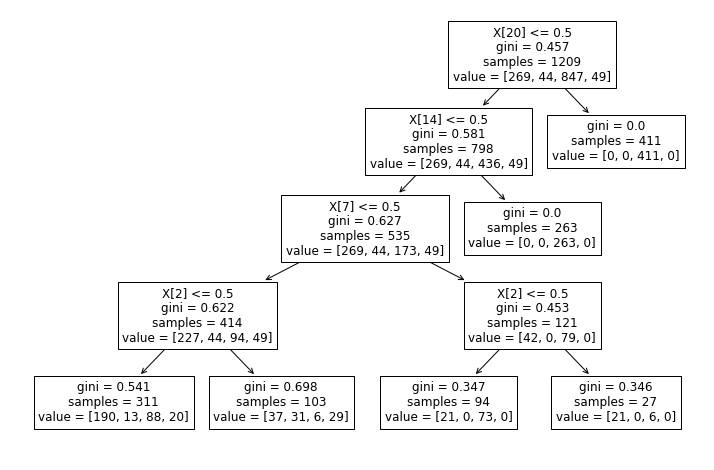

In [37]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [38]:
import sklearn
print (sklearn.__version__)

1.0.2


In [39]:
# pip install --upgrade scikit-learn

# Visualize decision-trees with graphviz

In [44]:
# import graphviz 
# dot_data = tree.export_graphviz(clf_gini, out_file=None, 
#                               feature_names=X_train.columns,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,special_characters=True 
#                               )

# graph = graphviz.Source(dot_data) 

# graph 

In [41]:
# pip install graphviz

# Decision Tree Classifier with criterion entropy

In [45]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [46]:
y_pred_en = clf_en.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8035


In [48]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'acc', 'unacc', ..., 'unacc', 'acc', 'unacc'], dtype=object)

In [71]:
unique, counts = np.unique(y_pred_en, return_counts=True)
dict(zip(unique, counts))

{'acc': 183, 'unacc': 336}

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8065


In [50]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8065
Test set score: 0.8035


[Text(0.6666666666666666, 0.875, 'X[20] <= 0.5\nentropy = 1.203\nsamples = 1209\nvalue = [269, 44, 847, 49]'),
 Text(0.5, 0.625, 'X[14] <= 0.5\nentropy = 1.483\nsamples = 798\nvalue = [269, 44, 436, 49]'),
 Text(0.3333333333333333, 0.375, 'X[3] <= 0.5\nentropy = 1.638\nsamples = 535\nvalue = [269, 44, 173, 49]'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.685\nsamples = 393\nvalue = [214, 44, 86, 49]'),
 Text(0.5, 0.125, 'entropy = 0.963\nsamples = 142\nvalue = [55, 0, 87, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 411\nvalue = [0, 0, 411, 0]')]

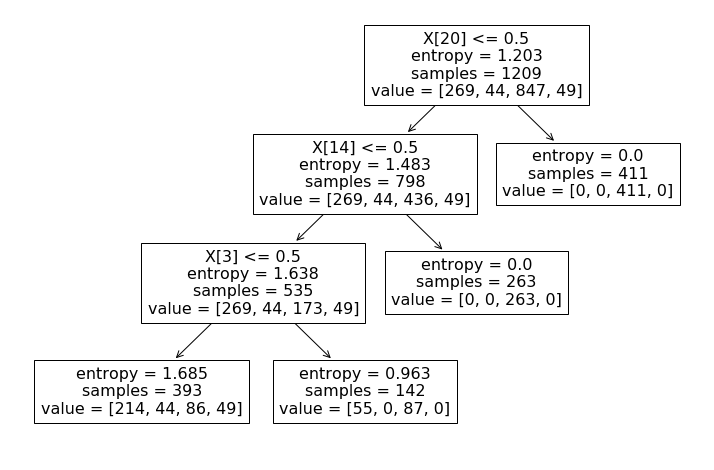

In [51]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

#  Confusion matrix

In [55]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

accuracy_score(y_test, y_pred_en)

Confusion matrix

 [[ 98   0  17   0]
 [ 25   0   0   0]
 [ 44   0 319   0]
 [ 16   0   0   0]]


0.8034682080924855

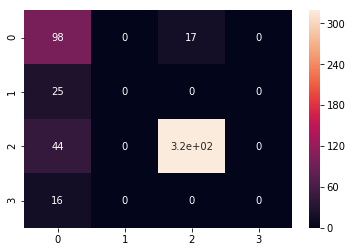

In [53]:
import seaborn as sns
sns.heatmap(cm,annot = True)  
plt.show()

# Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.54      0.85      0.66       115
        good       0.00      0.00      0.00        25
       unacc       0.95      0.88      0.91       363
       vgood       0.00      0.00      0.00        16

    accuracy                           0.80       519
   macro avg       0.37      0.43      0.39       519
weighted avg       0.78      0.80      0.78       519



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K fold validation

In [73]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_en, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

print()

print('Cross-validation Mean scores:{}'.format(scores.mean()))

Cross-validation scores:[0.76033058 0.73553719 0.79338843 0.74380165 0.74380165 0.81818182
 0.81818182 0.81818182 0.80991736 0.80833333]

Cross-validation Mean scores:0.784965564738292


# Conclusions

* Decision tree classifier model predict the class of the car. The model yields good result 0.80 with gini index and entropy criteria

* Training and Testing accuracy for both model is nearly same so therefore there is no chance of over fitting or under fitting

* The confusion matrix and classification report yields very good model performance